<a href="https://colab.research.google.com/github/carnival77/Machine_Learning/blob/master/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1.Input Data**

In [73]:
!pip install tensorflow==1.4
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# from colorama import init, Fore
# init()

#(1)
m = 30, a = 0.1, b = 0.4, σ = 0.03.

y=y^​+n -> y​=ax+b+n where n ~ N(0,0.05^2) 

1000개의 실수 [x,y] 데이터 생성
그 후 xi_arr, yi_arr 배열에 각각 저장.


In [0]:
num_points = 30
vertors = []
for i in range(num_points):
  xi= np.random.normal(0.0,0.5) # random x value
  y_hat = xi*0.1 + 0.4 # y_hat = 0.1*xi + 0.4
  yi= y_hat + np.random.normal(0.0, 0.05) # y=y^​+n -> y^​=ax+b+n where n ~ N(0,0.1^2)
  vertors.append([xi,yi]) # 1000개의 [x,y] 데이터 생성.
xi_arr = [v[0] for v in vertors]
yi_arr = [v[1] for v in vertors]
  

#(2)
straight line of linear function y_hat = 0.1*xi + 0.4 
and data_set points

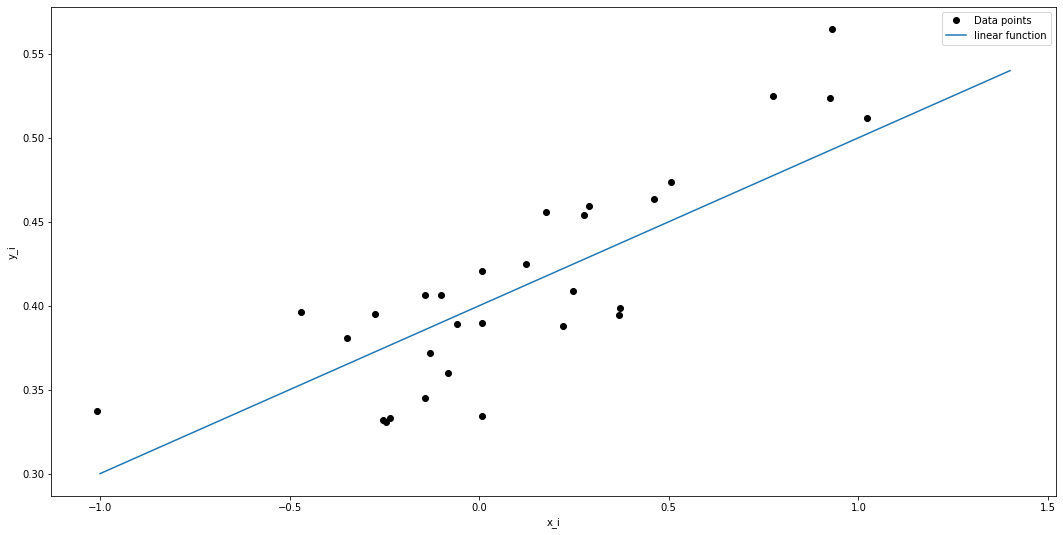

In [75]:
plt.plot(xi_arr,yi_arr,"ko",label = "Data points")
a_val = np.arange(-1.0,1.5,0.2)
y=[0.1*x +0.4 for x in a_val]
plt.xlabel('x_i')
plt.ylabel('y_i')
plt.plot(a_val,y,label="linear function")
plt.legend()
plt.show()

#**2. Output results**

W : theta_1 = -1 과 1 사이의 실수

b : theta_0

OF = objective function

In [0]:
W = tf.Variable(tf.random_uniform([1],-1.5,1.5))
b=tf.Variable(tf.zeros([1]))
y=xi_arr*W+b
OF = tf.reduce_mean(tf.square(y-yi_arr))

Minimize gap using Gradient Descent 

Set learning rate with 0.5

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(OF)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

30회 반복

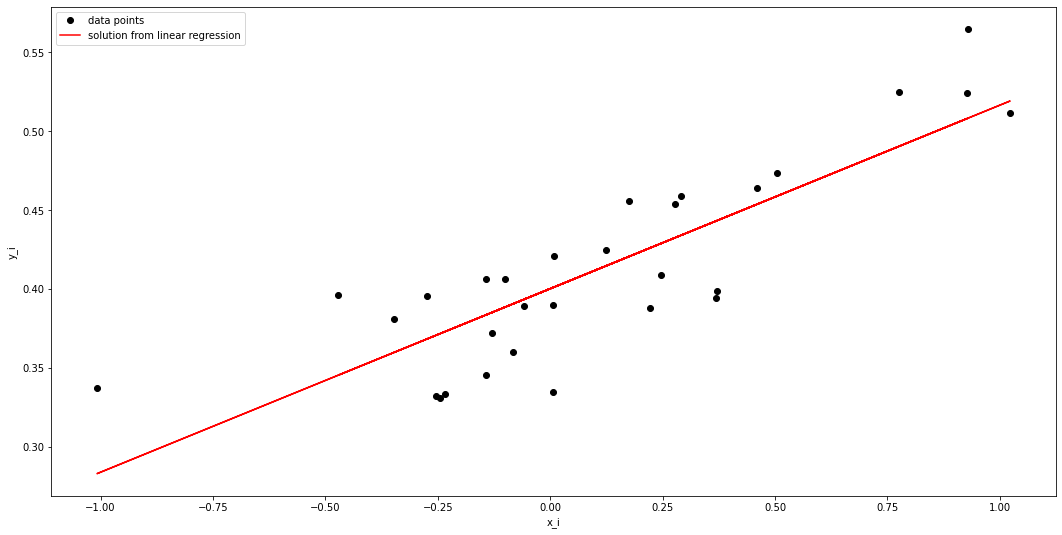

In [78]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
theta_0 = []
theta_1=[]
OF_val=[]
for step in range(30):
  sess.run(train)
  theta_1.append(sess.run(W))
  theta_0.append(sess.run(b))
  OF_val.append([sess.run(OF,feed_dict={X: xi_arr, Y: yi_arr})])
plt.xlabel('x_i')
plt.ylabel('y_i')
plt.plot(xi_arr,yi_arr,'ko',label="data points")
plt.plot(xi_arr,sess.run(W)*xi_arr + sess.run(b),color="red",label="solution from linear regression")
plt.legend()
plt.show()

1의 초기 가정된 linear function 과 linear regression 을 통해 얻은 solution 비교

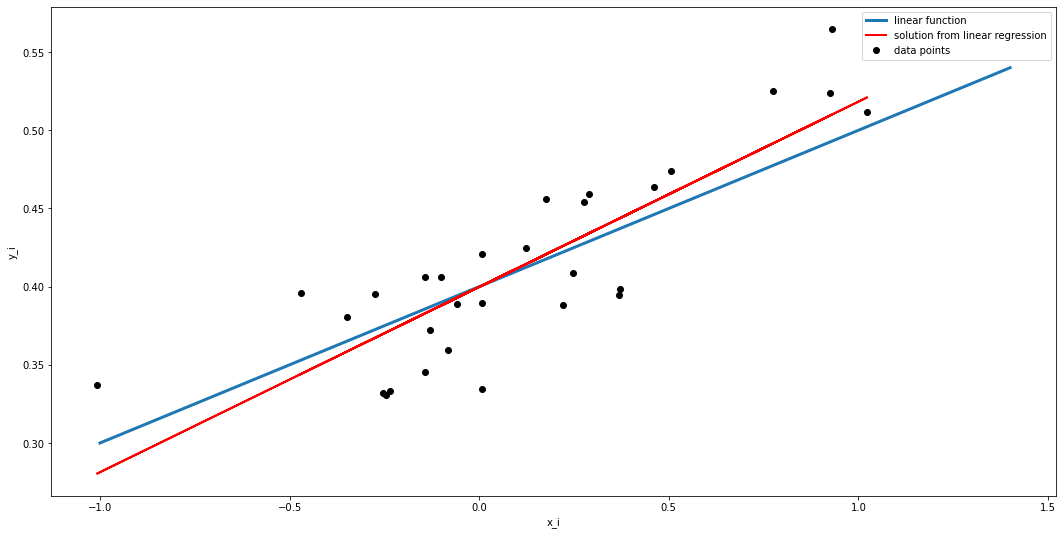

In [79]:
a_val = np.arange(-1.0,1.5,0.2)
y=[0.1*x +0.4 for x in a_val]

for step in range(30):
  sess.run(train)

hypothesis = plt.plot(a_val,y,label="linear function")
solution = plt.plot(xi_arr,sess.run(W)*xi_arr + sess.run(b),
                    color="red",label="solution from linear regression")
plt.plot(xi_arr,yi_arr,'ko',label="data points")

plt.setp(solution,linewidth=2.0)
plt.setp(hypothesis,linewidth=3.0)
plt.xlabel('x_i')
plt.ylabel('y_i')

plt.legend()
plt.show()

#**3.Plotting the energy values**

(1) the value of the objective function at every optimization step by the gradient descent algorithm

목적함수의 값은 초기값 0.017에서 0에 가까이 수렴한다.

step objective values
0 [0.17102163]
1 [0.11263401]
2 [0.07433841]
3 [0.049193416]
4 [0.032683156]
5 [0.021842474]
6 [0.014724459]
7 [0.010050752]
8 [0.0069819824]
9 [0.0049670204]
10 [0.0036439924]
11 [0.0027752887]
12 [0.002204895]
13 [0.0018303731]
14 [0.0015844615]
15 [0.001422995]
16 [0.0013169757]
17 [0.0012473634]
18 [0.0012016558]
19 [0.001171644]
20 [0.001151938]
21 [0.0011389989]
22 [0.0011305035]
23 [0.0011249249]
24 [0.0011212624]
25 [0.0011188572]
26 [0.0011172781]
27 [0.0011162414]
28 [0.0011155605]
29 [0.0011151135]



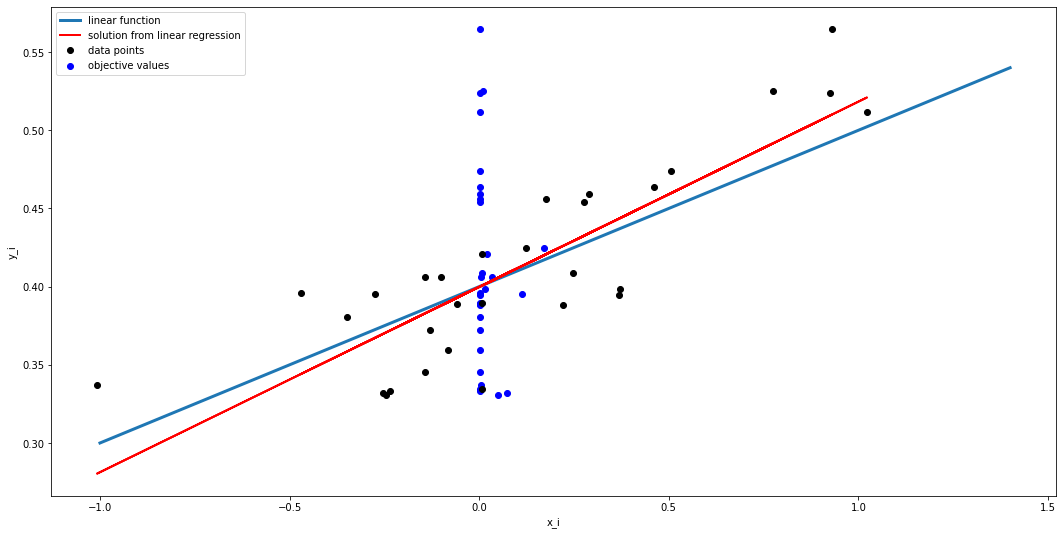

In [80]:
print("step objective values")
a_val = np.arange(-1.0,1.5,0.2)
y=[0.1*x +0.4 for x in a_val]

for step in range(30):
  sess.run(train)

hypothesis = plt.plot(a_val,y,label="linear function")
solution = plt.plot(xi_arr,sess.run(W)*xi_arr + sess.run(b),
                    color="red",label="solution from linear regression")
plt.plot(xi_arr,yi_arr,'ko',label="data points")

plt.setp(solution,linewidth=2.0)
plt.setp(hypothesis,linewidth=3.0)
plt.xlabel('x_i')
plt.ylabel('y_i')

for step in range(30):
  print(step, OF_val[step])
print()
plt.scatter(OF_val,yi_arr,color="blue",label="objective values")

plt.rcParams['figure.figsize'] = [18, 9]
plt.legend()
plt.show()